# Artificial Neural Network

### Importing the libraries

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score


## Part 1 - Data Preprocessing

### Importing the dataset

In [21]:
dataset = pd.read_csv('Churn_Modelling.csv')

X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding categorical data

Label Encoding the "Gender" column

In [22]:
le = LabelEncoder()
print(X[:,2])
X[:, 2] = le.fit_transform(X[:, 2])
print(X[:,2])

['Female' 'Female' 'Female' ... 'Female' 'Male' 'Female']
[0 0 0 ... 0 1 0]


One Hot Encoding the "Geography" column

In [23]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Feature Scaling

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[0,:])

[-1.01460667 -0.5698444   1.74309049  0.16958176 -1.09168714 -0.46460796
  0.00666099 -1.21571749  0.8095029   0.64259497 -1.03227043  1.10643166]


## Part 2 - Building the ANN

### Initializing the ANN

In [29]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
r = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.5730 - loss: 0.6567
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.7977 - loss: 0.4726
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7982 - loss: 0.4384
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.7995 - loss: 0.4313
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7888 - loss: 0.4408
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.7994 - loss: 0.4234
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.7912 - loss: 0.4298
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.8043 - loss: 0.4221
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.8071 - loss: 0.4271
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.8051 - loss: 0.4333
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.8184 - loss: 0.4146
Epoch 12/100
250/25

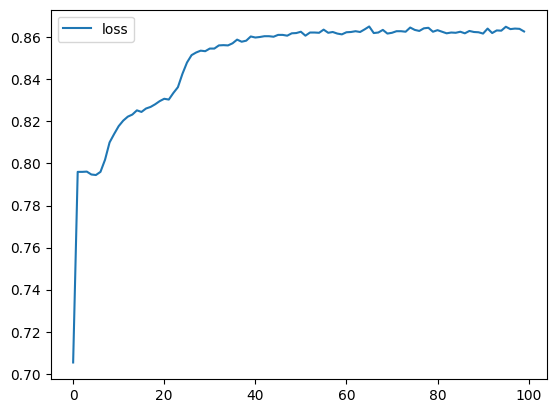

In [32]:
import matplotlib.pyplot as plt
# plot Loss
plt.plot(r.history['accuracy'],label='loss')
plt.legend()

### Training the ANN on the Training set

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [18]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1529   66]
 [ 206  199]]


0.864